# Has the Gender pay gap grown smaller?



In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [260]:
df = pd.read_csv('./earn_gr_gpgr2_.csv')

In [261]:
df.head()


,freq;unit;nace_r2;geo\TIME_PERIOD,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,A;PC;B;AT,:,:,:,18.3,:,:,:,15.9,13.7,14.4,10.9,7.9
1,A;PC;B;BE,-7.2,-8.8,-10.1,-13.4,-10.4,-7.1,-4.1,-1.0,-1.5,-2.1,-2.6,-3.1
2,A;PC;B;BG,26.9,23.7,18.8,15.9,16.4,21.2,17.1,16.8,17.7,15.0,14.5,12.2
3,A;PC;B;CH,:,7.8 d,7.7 d,5.2,10.4,9.6,9.0,8.2,8.3,8.1,7.9,:
4,A;PC;B;CY,:,39.7 u,27.7 u,15.5 u,16.6 u,17.4 u,26.7 u,22.7 u,35.6 u,29.3 u,34.3 u,42.2 u


In [262]:
# in the source document NaN values were label ' :', thus I changed it into NaN
data=df.replace(': ',np.NaN)
data=data.replace([' u', ' d', ' p', ' e', ' b', ': c', ': ', ':'],'',regex=True)
data.to_csv('clean_gender_pay_Data.csv')

data


,freq;unit;nace_r2;geo\TIME_PERIOD,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,A;PC;B;AT,NaN,NaN,NaN,18.3,NaN,NaN,NaN,15.9,13.7,14.4,10.9,7.9
1,A;PC;B;BE,-7.2,-8.8,-10.1,-13.4,-10.4,-7.1,-4.1,-1.0,-1.5,-2.1,-2.6,-3.1
2,A;PC;B;BG,26.9,23.7,18.8,15.9,16.4,21.2,17.1,16.8,17.7,15.0,14.5,12.2
3,A;PC;B;CH,NaN,7.8,7.7,5.2,10.4,9.6,9.0,8.2,8.3,8.1,7.9,NaN
4,A;PC;B;CY,NaN,39.7,27.7,15.5,16.6,17.4,26.7,22.7,35.6,29.3,34.3,42.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,A;PC;S;SE,NaN,14.0,13.2,13.7,13.0,10.9,10.6,9.6,8.3,7.0,5.6,7.3
716,A;PC;S;SI,36.4,36.4,35.4,36.8,32.5,32.0,31.6,28.3,24.0,18.8,12.8,6.5
717,A;PC;S;SK,NaN,6.0,1.0,-2.8,8.0,4.0,-11.9,-1.8,-7.5,-10.8,-8.0,-9.4
718,A;PC;S;TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1,NaN,NaN,NaN,NaN


In [263]:
data.dtypes

freq;unit;nace_r2;geo\TIME_PERIOD    object
2007                                 object
2008                                 object
2009                                 object
2010                                 object
2011                                 object
2012                                 object
2013                                 object
2014                                 object
2015                                 object
2016                                 object
2017                                 object
2018                                 object
dtype: object

In [264]:
#remove space from column names 
str_list=data.columns
for i,item in enumerate(str_list):
    data.rename(columns={str_list[i]:item.replace(' ','')},inplace=True)
    
data.columns

Index(['freq;unit;nace_r2;geo\TIME_PERIOD', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [268]:
# change data type to float
#data=df.replace(' ',np.NaN)
#data 
data.isnull().values.any()
data.isnull().sum()

freq;unit;nace_r2;geo\TIME_PERIOD      0
2007                                 453
2008                                 202
2009                                 202
2010                                  94
2011                                 148
2012                                 148
2013                                 127
2014                                  13
2015                                 150
2016                                 128
2017                                 127
2018                                 103
dtype: int64

In [274]:
#data=data[data.columns[1:]].astype('float64')
#data.apply(pd.to_numeric, args=('coerce',))
#data.replace(r' ', np.nan, regex=True)

for col in ['2007', '2008', '2009','2010', '2011', '2012','2013','2014','2015','2016','2017','2018']:
    try:
        data[col] = data[col].replace(' ','', regex=True).astype('float64')
        #data[col] = data[col].astype('float64')
    except ValueError as e:
        print(e) 
        print (col)
data.dtypes


could not convert string to float: 
2011
could not convert string to float: 
2012
could not convert string to float: 
2013
could not convert string to float: 
2014
could not convert string to float: 
2015
could not convert string to float: 
2016
could not convert string to float: 
2017
could not convert string to float: 
2018


freq;unit;nace_r2;geo\TIME_PERIOD     object
2007                                 float64
2008                                 float64
2009                                 float64
2010                                 float64
2011                                  object
2012                                  object
2013                                  object
2014                                  object
2015                                  object
2016                                  object
2017                                  object
2018                                  object
dtype: object

In [270]:
data.dtypes

freq;unit;nace_r2;geo\TIME_PERIOD     object
2007                                 float64
2008                                 float64
2009                                 float64
2010                                 float64
2011                                  object
2012                                  object
2013                                  object
2014                                  object
2015                                  object
2016                                  object
2017                                  object
2018                                  object
dtype: object

In [128]:
data.columns

Index(['freq;unit;nace_r2;geo\TIME_PERIOD', '2007 ', '2008 ', '2009 ', '2010 ',
       '2011 ', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 '],
      dtype='object')

In [129]:
data.shape


(720, 13)

In [130]:
#data.describe()

In [131]:
new = df['freq;unit;nace_r2;geo\\TIME_PERIOD'].str.split(";", n = 0, expand = True)
#Since in the given data frame , and ; are delimeters we made new data frame and split one collumn into 4 new ones 
#The names for new columns are extracted 
new_col=df.columns[0].split(';')
#New columns are rename and for the last column we use only 'geo'
new.rename(columns={0:new_col[0] , 1:new_col[1], 2:new_col[2], 3: 'geo'},inplace=True)
data=pd.concat([new,data],axis=1)
data.to_csv('gender_pay_Data.csv')

data

,freq,unit,nace_r2,geo,freq;unit;nace_r2;geo\TIME_PERIOD,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,A,PC,B,AT,A;PC;B;AT,NaN,NaN,NaN,18.3,NaN,NaN,NaN,15.9,13.7,14.4,10.9,7.9
1,A,PC,B,BE,A;PC;B;BE,-7.2,-8.8,-10.1,-13.4,-10.4,-7.1,-4.1,-1.0,-1.5,-2.1,-2.6,-3.1
2,A,PC,B,BG,A;PC;B;BG,26.9,23.7,18.8,15.9,16.4,21.2,17.1,16.8,17.7,15.0,14.5,12.2
3,A,PC,B,CH,A;PC;B;CH,NaN,7.8,7.7,5.2,10.4,9.6,9.0,8.2,8.3,8.1,7.9,NaN
4,A,PC,B,CY,A;PC;B;CY,NaN,39.7,27.7,15.5,16.6,17.4,26.7,22.7,35.6,29.3,34.3,42.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,A,PC,S,SE,A;PC;S;SE,NaN,14.0,13.2,13.7,13.0,10.9,10.6,9.6,8.3,7.0,5.6,7.3
716,A,PC,S,SI,A;PC;S;SI,36.4,36.4,35.4,36.8,32.5,32.0,31.6,28.3,24.0,18.8,12.8,6.5
717,A,PC,S,SK,A;PC;S;SK,NaN,6.0,1.0,-2.8,8.0,4.0,-11.9,-1.8,-7.5,-10.8,-8.0,-9.4
718,A,PC,S,TR,A;PC;S;TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1,NaN,NaN,NaN,NaN


In [132]:
data.drop(['freq;unit;nace_r2;geo\TIME_PERIOD'], axis=1, inplace=True)
data

,freq,unit,nace_r2,geo,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,A,PC,B,AT,NaN,NaN,NaN,18.3,NaN,NaN,NaN,15.9,13.7,14.4,10.9,7.9
1,A,PC,B,BE,-7.2,-8.8,-10.1,-13.4,-10.4,-7.1,-4.1,-1.0,-1.5,-2.1,-2.6,-3.1
2,A,PC,B,BG,26.9,23.7,18.8,15.9,16.4,21.2,17.1,16.8,17.7,15.0,14.5,12.2
3,A,PC,B,CH,NaN,7.8,7.7,5.2,10.4,9.6,9.0,8.2,8.3,8.1,7.9,NaN
4,A,PC,B,CY,NaN,39.7,27.7,15.5,16.6,17.4,26.7,22.7,35.6,29.3,34.3,42.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,A,PC,S,SE,NaN,14.0,13.2,13.7,13.0,10.9,10.6,9.6,8.3,7.0,5.6,7.3
716,A,PC,S,SI,36.4,36.4,35.4,36.8,32.5,32.0,31.6,28.3,24.0,18.8,12.8,6.5
717,A,PC,S,SK,NaN,6.0,1.0,-2.8,8.0,4.0,-11.9,-1.8,-7.5,-10.8,-8.0,-9.4
718,A,PC,S,TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1,NaN,NaN,NaN,NaN


In [133]:
data.columns

Index(['freq', 'unit', 'nace_r2', 'geo', '2007 ', '2008 ', '2009 ', '2010 ',
       '2011 ', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 '],
      dtype='object')

In [134]:
#remove from column names spaces 
str_list=data.columns
for i,item in enumerate(str_list):
    data.rename(columns={str_list[i]:item.replace(' ','')},inplace=True)

In [135]:
#check the list of the countries
data.geo.unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES',
       'FI', 'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK',
       'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'TR',
       'UK', 'IS'], dtype=object)

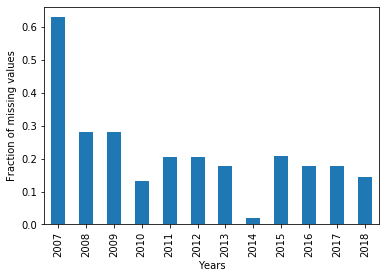

In [136]:
#Check the missing values
(data[data.columns[4:]].isnull().sum()/len(data)).plot.bar()
plt.ylabel('Fraction of missing values')
plt.xlabel('Years')
plt.show()

In [ ]:
data.fillna(value=0,inplace=True)

#How has gender pay gap changed over a decade in Europe?

In [141]:
#data.groupby('nace_r2').sum().loc['TOTAL'].plot.bar()
data.groupby('nace_r2').sum().plot.bar()
plt.ylabel('Gender Pay gap')
plt.xlabel('Years')
plt.title('Total number in the EU')
plt.show()

TypeError: no numeric data to plot